<a href="https://colab.research.google.com/github/MorgooN/ML-Labs/blob/main/LAB3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [54]:
df = pd.read_csv("/content/games-release-ALL.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        66427 non-null  int64 
 1   game              66427 non-null  object
 2   link              66427 non-null  object
 3   release           66427 non-null  object
 4   peak_players      66427 non-null  object
 5   positive_reviews  66427 non-null  object
 6   negative_reviews  66427 non-null  object
 7   total_reviews     66427 non-null  object
 8   rating            66427 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [55]:
df.shape

(66427, 9)

In [56]:
df.head(12)

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%
5,5,东北之夏,/app/2121360/,Jan 9 2023,"8,672","8,891",165,165,95.08%
6,6,Crab Champions,/app/774801/,Apr 1 2023,"8,564","5,129",81,81,94.76%
7,7,Papa's Freezeria Deluxe,/app/2291760/,Mar 31 2023,"1,227","1,832",20,20,93.84%
8,8,A Space for the Unbound,/app/1201270/,Jan 19 2023,338,"1,917",27,27,93.64%
9,9,Handshakes,/app/2171690/,Jan 13 2023,195,"1,166",10,10,93.30%


In [57]:
df = df.drop('game', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('link', axis=1)
df = df.drop('release', axis=1)

In [58]:
df['positive_reviews'] = df['positive_reviews'].str.replace(',', '').astype(float)
df['negative_reviews'] = df['negative_reviews'].str.replace(',', '').astype(float)
df['peak_players'] = df['peak_players'].str.replace(',', '').astype(float)
df['rating'] = df['rating'].str.replace('%', '').astype(float)

In [60]:
df.head()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,4529.0,19807.0,227.0,20034.0,96.39
1,168191.0,61752.0,1616.0,63368.0,95.75
2,15543.0,12643.0,213.0,12856.0,95.54
3,1415.0,11717.0,209.0,11926.0,95.39
4,6132.0,14152.0,324.0,14476.0,95.09


In [61]:
df.shape

(66427, 5)

<Axes: >

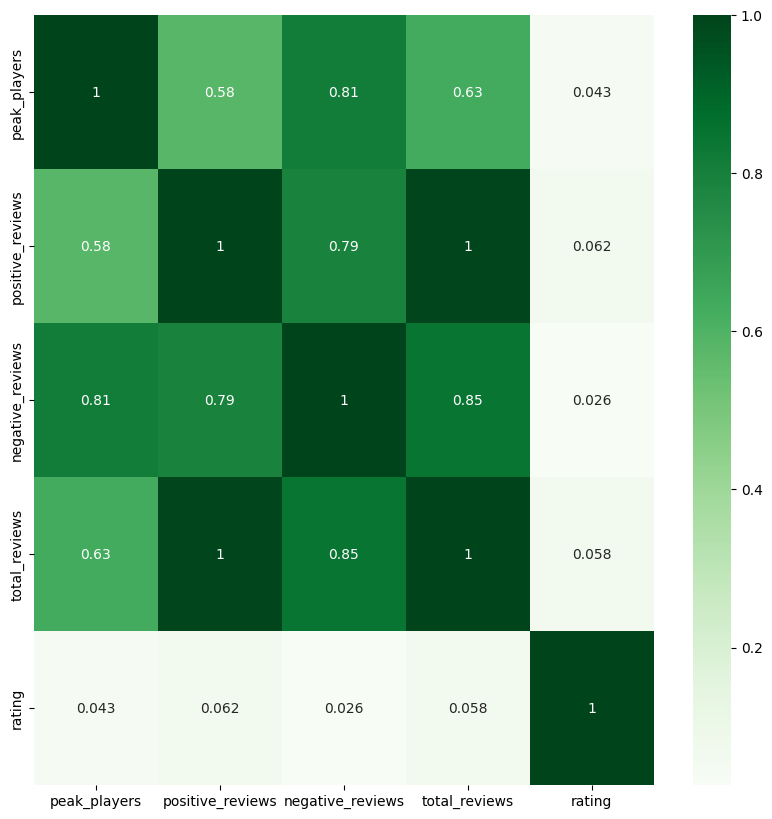

In [71]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="Greens",annot=True)

In [63]:
x = df.drop(['rating'],axis=1)
y = df['rating']

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2)

In [65]:
df.head()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,4529.0,19807.0,227.0,20034.0,96.39
1,168191.0,61752.0,1616.0,63368.0,95.75
2,15543.0,12643.0,213.0,12856.0,95.54
3,1415.0,11717.0,209.0,11926.0,95.39
4,6132.0,14152.0,324.0,14476.0,95.09


In [66]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [69]:
training_data_pred = model.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_pred)
print(f"R squared value: {r2_train}")

R squared value: 0.9997070219208986


In [70]:
test_data_pred = model.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_pred)
print(f"R squared value: {r2_test}")

R squared value: 0.9984013228637116
